# What is scikit-learn?

<img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png">

[scikit-learn](http://scikit-learn.org/stable/) is a (close to being "the") Python machine learning library. The central abstraction around which scikit-learn is built is that of an **estimator**. An estimator, in this context, is an object that is capable of

+ building a model on the basis of a sample, and 
+ using this model for characterizing new examples.

Most scikit-learn estimators are, of course, parametric supervised learning methods, but scikit-learn contains non-parametric and unsupervised estimators as well. Unsurprisingly, the two methods corresponding to "model building" and "characterizing new examples" are called

+ **fit**, and
+ **predict**.

Naturally, the performance of estimators can be evaluated using a wide variety of metrics, but every estimator implements a **score** method, which provides a default performance evaluation on a set of samples. The metric implemented by **score** depends on the task and learning algorithm of the estimator in question. 

Some estimators implement a joint **fit_predict** method as well, which can fit a model to a dataset and make predictions for a set of new examples in one step. In addition to being convenient, in certain situations fit_predict can be optimized and perform better than executing fit and predict separately.

On-line learning algorithms also implement a **partial-fit** method for learning from samples as they become available.


## Further reading

scikit-learn has a huge [documentation](http://scikit-learn.org/stable/documentation.html) of high quality. In addition to scikit-learn specific information, it is a treasure trove of general ML knowledge. Whenever you are trying to familiarize yourself with an ML algorithm and scikit-learn has an implementation then the corresponding sections, especially in the [User Guide](http://scikit-learn.org/stable/user_guide.html) are worth reading, even if you end up using a different implementation.

# A simple classification task

For demo purposes we generate a small classification dataset with 3 classes.

In [ ]:
import pandas as pd
from sklearn import datasets # datasets is a package

import numpy as np # General numaric library underlying the whole python scientific stack
np.random.seed(254) # Set the seed for reproducibility 

# Default method of Scikit to generate datasets randomly see: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
X, y = datasets.make_classification(1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3,
                                    n_clusters_per_class=1)

df = pd.DataFrame({"feature_1": X[:,0], "feature_2": X[:,1], "category":y},
                  columns=["feature_1", "feature_2", "category"]) # to have columns in this order and not lex. sorted
df.shape

(1000, 3)

In [ ]:
df.head()

,feature_1,feature_2,category
0,1.316455,1.906756,0
1,0.499191,-1.668219,2
2,0.937946,0.834301,0
3,0.930180,0.648558,0
4,0.309252,-1.365109,2


In [ ]:
df.describe()

,feature_1,feature_2,category
count,1000.000000,1000.000000,1000.000000
mean,0.332238,-0.299943,0.998000
std,1.142013,1.516528,0.818942
min,-2.234235,-5.113364,0.000000
25%,-0.779555,-1.399917,0.000000
50%,0.568081,-0.391351,1.000000
75%,1.221679,0.795395,2.000000
max,3.724172,4.034715,2.000000


In [ ]:
df.category.value_counts()

0    336
2    334
1    330
Name: category, dtype: int64

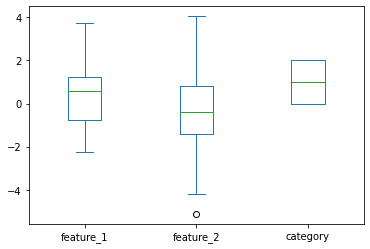

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pylab

df.plot.box()
plt.show();
# Pandas' plotting is done by https://matplotlib.org/ and in certain environments
# charts only appear if explicit "show()" is called. Generally good practice to do so.
# ; is for suppressing a printout of the show() function so as not to plot the figure object's reference

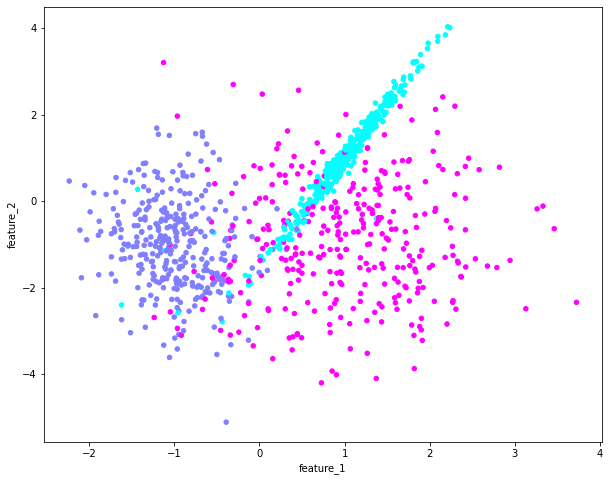

In [ ]:
# We use the "c" argument of the plot to add coloring to the chart - in this case, based on the classes
# cmap is the "color map scheme" we use 
df.plot.scatter("feature_1", "feature_2", c="category", cmap=pylab.cm.cool, figsize=(10,8), colorbar=False)
plt.show();

# Scaling

(Recall: scaling may or may not be necessary, or even optimal in a particular case.)

In [ ]:
## do import
from sklearn import preprocessing

In [ ]:
## initialize a scaler
scaler = preprocessing.StandardScaler()

In [ ]:
## fit the scaler
scaler.fit(df[["feature_1", "feature_2"]])

StandardScaler()

In [ ]:
## transform data = apply scaling
standardized = scaler.transform(df[["feature_1", "feature_2"]])
standardized

array([[ 0.86225717,  1.45582779],
       [ 0.14626453, -0.90269403],
       [ 0.53065139,  0.74829594],
       ...,
       [-1.11216242, -1.02386509],
       [ 1.82951322,  0.24260611],
       [ 0.12922246,  0.15564846]])

Note: as an alternative to `fit` + `transform`, you can directly use `fit_transform`.

In [ ]:
## create a scaled dataframe copy
df_scaled = df.copy()
df_scaled.loc[:, ["feature_1", "feature_2"]] = standardized

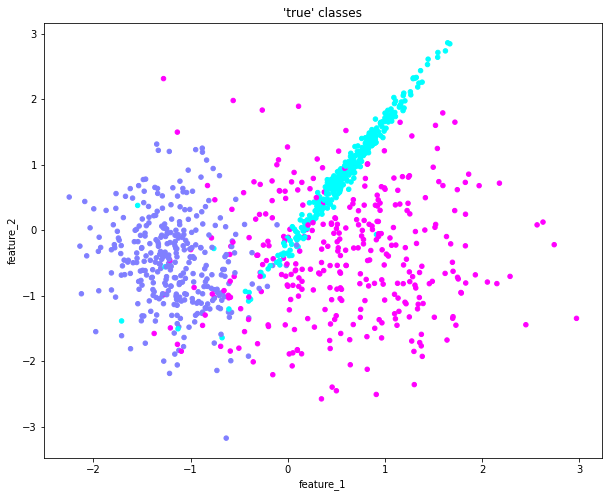

In [ ]:
df_scaled.plot.scatter("feature_1", "feature_2", c="category", cmap=pylab.cm.cool, title="'true' classes", figsize=(10,8), colorbar=False)
plt.show();

# K-means clustering

In [ ]:
## import the class
from sklearn.cluster import KMeans

In [ ]:
## initialize a specific model belonging to the model class of our choice
## specify any hyperparameters we need
## setting random state for reproducibility - number is arbitrary!
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
## fit our model
kmeans.fit(df_scaled[["feature_1", "feature_2"]])

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_scaled["kmeans_cluster"] = kmeans.predict(df_scaled[["feature_1", "feature_2"]]) 

Note: as an alternative to `fit` + `predict`, you can directly use `fit_predict`.

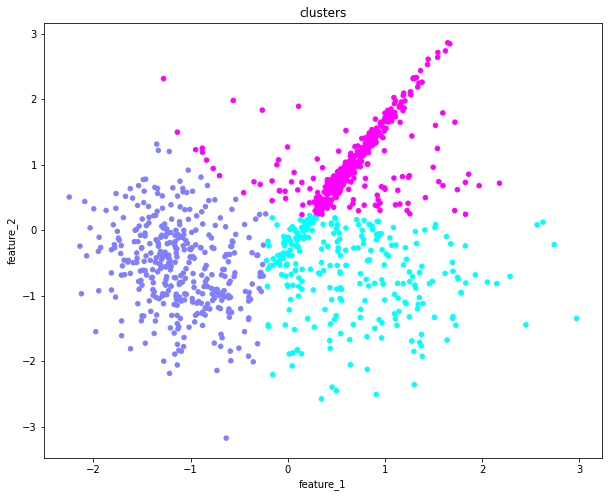

In [ ]:
df_scaled.plot.scatter("feature_1", "feature_2", c="kmeans_cluster", cmap=pylab.cm.cool, figsize=(10,8), title="clusters", colorbar=False)
plt.show();

This is NOT a classification task, but how would our clusters fare wrt "category"?

First, note that the number labels for the clusters are arbitrary, so we have to find the most probable clusternumber - categorynumber pairing.

In [ ]:
## get the counts of cluster - category label pairs
tmp = df_scaled[["kmeans_cluster", "category", ]].value_counts()
## in case same category is higher in value counts for a second cluster: drop duplicates of counts for category labels
tmp = tmp[~tmp.index.get_level_values(1).duplicated(keep="first")]
## we need the most probable combinations; for 3 clusters, the first 3 rows of the filtered value counts
most_common_pairs = tmp.iloc[:3]
most_common_pairs

kmeans_cluster  category
1               1           319
2               0           269
0               2           210
dtype: int64

In [ ]:
## create a most probable kmeans cluster number : category number dictionary
c_dict = dict(most_common_pairs.index.tolist())
## turn cluster numbers to category numbers
df_scaled["kmeans_cluster"] = df_scaled["kmeans_cluster"].map(lambda x: c_dict[x])

[sklearn's metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) contains all kinds of metrics, often ending with "_score".

* Always pay attention to the order of arguments (for classification metrics, true first, predicted second).

In [ ]:
from sklearn import metrics

In [ ]:
print("Confusion matrix:")
## we want to see the largest numbers along the main diagonal (=> true = predicted)

confm = metrics.confusion_matrix(df_scaled["category"], df_scaled["kmeans_cluster"])
confm_df = pd.DataFrame(confm)
confm_df.index.name = "true"
confm_df.columns.name = "pred"
display(confm_df)

Confusion matrix:


pred,0,1,2
true,,,
0,269,13,54
1,6,319,5
2,79,45,210


In [ ]:
# this is a multiclass case, so we have to average scores; here, we do it with "support" as weight
print("Accuracy:",  metrics.accuracy_score(df_scaled["category"], df_scaled["kmeans_cluster"]))
print("Precision:", metrics.precision_score(df_scaled["category"], df_scaled["kmeans_cluster"], average="weighted"))
print("Recall:",    metrics.recall_score(df_scaled["category"], df_scaled["kmeans_cluster"], average="weighted"))
print("F-measure:", metrics.f1_score(df_scaled["category"], df_scaled["kmeans_cluster"], average="weighted"))

Accuracy: 0.798
Precision: 0.7952962975528662
Recall: 0.798
F-measure: 0.7924129182511279


# K-nearest neighbors

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)

knn.fit(X=df[["feature_1", "feature_2"]], y=df.category)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.predict([(0,0)]) # predict expects two-dimensional input ("list of examples")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2])

Let us try to evaluate the model!

In [ ]:
df["knn_prediction"] = knn.predict(df[["feature_1", "feature_2"]])
df.head()

,feature_1,feature_2,category,knn_prediction
0,1.316455,1.906756,0,0
1,0.499191,-1.668219,2,2
2,0.937946,0.834301,0,0
3,0.930180,0.648558,0,0
4,0.309252,-1.365109,2,2


In [ ]:
from sklearn import metrics
knn_metrics = metrics.precision_recall_fscore_support(df.category, df.knn_prediction)
# returns [precision for all classes, recall for all classes, f-score for all classes, # supporting samples for all classes] 
knn_metrics

(array([0.88108108, 0.898017  , 0.94945848]),
 array([0.9702381 , 0.96060606, 0.78742515]),
 array([0.92351275, 0.92825769, 0.8608838 ]),
 array([336, 330, 334]))

In [ ]:
metrics.precision_score(df.category, df.knn_prediction, average="weighted") # average with support as weight

0.9095079858824062

In [ ]:
metrics.recall_score(df.category, df.knn_prediction, average="weighted")

0.906

In [ ]:
knn_f1 = metrics.f1_score(df.category, df.knn_prediction, average="weighted")
knn_f1


0.9041605081053793

# One-vs-Rest with linear classifiers

In [ ]:
from sklearn import linear_model  # sklearn module for ML with linear models

lr = linear_model.LogisticRegression()

lr.fit(X=df[["feature_1", "feature_2"]], y=df.category)

df["lr_prediction"] = lr.predict(df[["feature_1", "feature_2"]])

df.head(10)

,feature_1,feature_2,category,knn_prediction,lr_prediction
0,1.316455,1.906756,0,0,0
1,0.499191,-1.668219,2,2,2
2,0.937946,0.834301,0,0,0
3,0.930180,0.648558,0,0,0
4,0.309252,-1.365109,2,2,2
5,-1.038751,0.287267,1,1,1
6,2.335299,-1.430019,2,2,2
7,1.434864,-2.794581,2,2,2
8,1.366517,1.884368,0,0,0
9,3.330766,-0.114013,2,2,2


In [ ]:
metrics.precision_recall_fscore_support(df.category, df.lr_prediction)

(array([0.81924198, 0.9002849 , 0.80718954]),
 array([0.83630952, 0.95757576, 0.73952096]),
 array([0.82768778, 0.92804699, 0.771875  ]),
 array([336, 330, 334]))

In [ ]:
metrics.precision_score(df.category, df.lr_prediction, average="weighted") # average with support as weight

0.8419606304060084

In [ ]:
metrics.recall_score(df.category, df.lr_prediction, average="weighted") # average with support as weight

0.844

In [ ]:
lr_f1 = metrics.f1_score(df.category, df.lr_prediction, average="weighted") # average with support as weight
lr_f1

0.8421648493914347

# Decision boundaries

**This is not a task, only an educative visual example.**


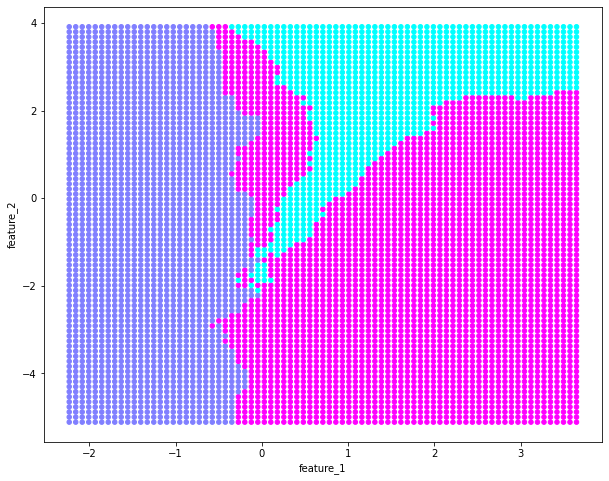

In [ ]:
# For visualizing the decision boundary of the models
# we generate a 2D grid for the features using NumPy which we
# will study later on

n_steps = 80

xmin, xmax = df.feature_1.min(), df.feature_1.max()
ymin, ymax = df.feature_2.min(), df.feature_2.max()

xstep = (xmax - xmin)/(n_steps - 1)
ystep = (ymax - ymin)/(n_steps - 1)

xs = np.arange(xmin, xmax, xstep)
ys = np.arange(ymin, ymax, ystep)

grid_xs, grid_ys = np.meshgrid(xs, ys)

df_grid = pd.DataFrame({"feature_1": grid_xs.flatten(), "feature_2": grid_ys.flatten()}) # Grid dataframe

# K-nn prediction on the grid

df_grid["knn_predict"] =  knn.predict(df_grid[["feature_1", "feature_2"]])

df_grid.plot.scatter("feature_1", "feature_2", c="knn_predict", cmap=pylab.cm.cool, figsize=(10,8), colorbar=False)
plt.show()

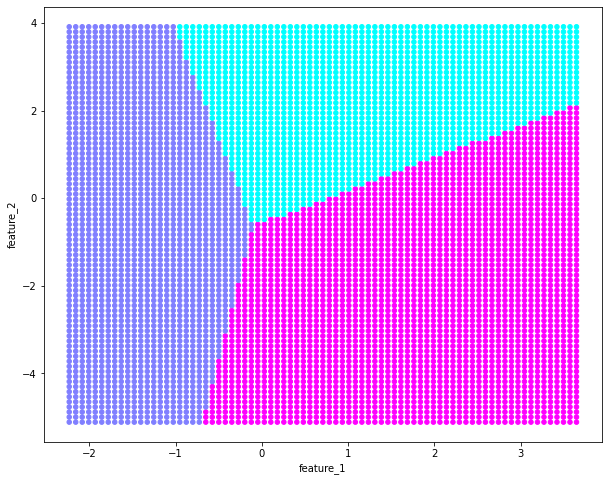

In [ ]:
# Logistic regression predictions on the grid

df_grid["lr_predict"] =  lr.predict(df_grid[["feature_1", "feature_2"]])
df_grid.plot.scatter("feature_1", "feature_2", c="lr_predict", cmap=pylab.cm.cool, figsize=(10,8), colorbar=False)
plt.show()

# Pipelines and transformers

There are many situations when a learning method is applied to a **transformed** version of the original dataset and -- in prediction phase -- of new examples. The possible transformations range from relatively simple standardization steps to highly complex transformations from one feature space to another. Such transformations are often applied sequentially after one another constituting a **pipeline**; e.g. before applying a learning method, data can be standardized and then transformed to another feature space. Such pipelines form a natural unit with respect to training, validation an prediction.

<img src="https://www.researchgate.net/profile/Matthieu-Vanhoutte/publication/331588166/figure/fig40/AS:734039443009540@1552020049274/Illustration-de-lutilisation-du-wrapper-Pipeline-de-la-librairie-scikit-learn-Raschka.ppm" width="600px">

scikit-learn supports the use of pipelines with a corresponding [Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class. A scikit-learn pipeline consists of 

+ one or more transformer objects, i.e., objects implementing the **fit** and **transform** methods, and
+ a final object implementing **fit**

and has all methods of the final element, i.e., it acts as a classifier if the last element is a classifier, etc. The transform method that should be implemented by the previous elements is what actually performs the data transformation on the basis of the model that was produced by their fit method. Analogously to the fit_predict methods of some estimators, some transformer classes offer a combined fit_transform method as well.

As a very simple example, we build a standard scaler + K-nn classifier pipeline for our data.




## Trivial example: scaler + K-nn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

The [StandardScaler class](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) centers the data on the mean and then scales to 1 variance by default.

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

knn_pipe = Pipeline([("scaler", scaler), ("knn", knn)])

knn_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [ ]:
knn_pipe.fit(df[["feature_1", "feature_2"]], df.category)

df["pipe_prediction"] = knn_pipe.predict(df[["feature_1", "feature_2"]])

df.head()

,feature_1,feature_2,category,knn_prediction,lr_prediction,pipe_prediction
0,1.316455,1.906756,0,0,0,0
1,0.499191,-1.668219,2,2,2,2
2,0.937946,0.834301,0,0,0,0
3,0.930180,0.648558,0,0,0,0
4,0.309252,-1.365109,2,2,2,2


In [ ]:
knn_pipe_metrics = metrics.precision_recall_fscore_support(df.category, df.pipe_prediction)
knn_pipe_metrics

(array([0.88586957, 0.90056818, 0.95357143]),
 array([0.9702381 , 0.96060606, 0.7994012 ]),
 array([0.92613636, 0.92961877, 0.86970684]),
 array([336, 330, 334]))

In [ ]:
for i in range(3):
    print(knn_pipe_metrics[i] - knn_metrics[i])

[0.00478848 0.00255118 0.00411294]
[0.         0.         0.01197605]
[0.00262362 0.00136108 0.00882304]


In [ ]:
knn_pipe_f1 = metrics.f1_score(df.category, df.pipe_prediction, average="weighted")
knn_pipe_f1

0.9084380964207591

In [ ]:
knn_pipe_f1 - knn_f1

0.004277588315379832

In this case scaling improved the scores, but the improvement is negligible (0.4% for F-measure).